In [2]:
import numpy as np
import pandas as pd 
import os
import matplotlib.pyplot as plt

In [3]:
!pip install torch

You should consider upgrading via the 'C:\Users\poorna sri\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [4]:
!pip install torchvision

You should consider upgrading via the 'C:\Users\poorna sri\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [5]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader,random_split,TensorDataset
from torchvision.utils import make_grid
from torchvision.transforms import ToTensor
from torchvision.datasets import ImageFolder
import torchvision.transforms as transforms
import torchvision.models as models

In [6]:
!pip install tqdm

You should consider upgrading via the 'C:\Users\poorna sri\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [7]:
from tqdm.notebook import tqdm


In [8]:
!pip install jovian --upgrade --quiet


You should consider upgrading via the 'C:\Users\poorna sri\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [9]:
project_name = 'plant-disease-classification'


In [10]:
data ='../dataset/'
os.listdir(data)

['New Plant Diseases Dataset(Augmented)']

In [11]:
os.listdir(data+'New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)')


['train', 'valid']

In [12]:
os.listdir(data+'New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train')


['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___healthy',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___healthy',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___healthy',
 'Potato___Late_blight',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___healthy',
 'Strawberry___Leaf_scorch',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___healthy',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spid

In [13]:
unique_plants = []
cl = os.listdir(data+'New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train')
for i in cl:
    x = i.split('_')
    if x[0] not in unique_plants:
        unique_plants.append(x[0])
print("Number of Unique Plants: ",len(unique_plants))
print("Unique Plants: ",unique_plants)

Number of Unique Plants:  14
Unique Plants:  ['Apple', 'Blueberry', 'Cherry', 'Corn', 'Grape', 'Orange', 'Peach', 'Pepper,', 'Potato', 'Raspberry', 'Soybean', 'Squash', 'Strawberry', 'Tomato']


In [14]:
transform = transforms.Compose(
    [transforms.Resize(size = 128),
     transforms.ToTensor()])

In [15]:
dataset = ImageFolder(data+'New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train',transform=transform)
test_ds = ImageFolder(data+'New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid',transform=transform)

In [16]:
print("Number of training images: ",len(dataset))
print("Number of testing images: ",len(test_ds))

Number of training images:  70295
Number of testing images:  17572


In [17]:
num_classes = dataset.classes
print("Number of classes: ",len(num_classes))
print(num_classes)

Number of classes:  38
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mit

In [18]:
image, label  = dataset[0]
print("Image shape:",image.shape)
print("Image Label: ",label)
print("Image Label: ",dataset.classes[label])
print(image)

Image shape: torch.Size([3, 128, 128])
Image Label:  0
Image Label:  Apple___Apple_scab
tensor([[[0.6588, 0.6549, 0.6510,  ..., 0.7373, 0.7333, 0.7176],
         [0.6627, 0.6588, 0.6510,  ..., 0.7373, 0.7373, 0.7294],
         [0.6667, 0.6667, 0.6667,  ..., 0.7333, 0.7294, 0.7294],
         ...,
         [0.4118, 0.4039, 0.3961,  ..., 0.4863, 0.4902, 0.4902],
         [0.4000, 0.4078, 0.4000,  ..., 0.4941, 0.4980, 0.4980],
         [0.4000, 0.4039, 0.4000,  ..., 0.4706, 0.4784, 0.4824]],

        [[0.6431, 0.6392, 0.6353,  ..., 0.7255, 0.7216, 0.7059],
         [0.6471, 0.6431, 0.6353,  ..., 0.7255, 0.7255, 0.7176],
         [0.6510, 0.6510, 0.6510,  ..., 0.7216, 0.7176, 0.7176],
         ...,
         [0.3725, 0.3647, 0.3569,  ..., 0.4235, 0.4275, 0.4275],
         [0.3608, 0.3686, 0.3608,  ..., 0.4314, 0.4353, 0.4353],
         [0.3608, 0.3647, 0.3608,  ..., 0.4078, 0.4157, 0.4196]],

        [[0.7725, 0.7686, 0.7647,  ..., 0.8392, 0.8353, 0.8196],
         [0.7765, 0.7725, 0.7647,  

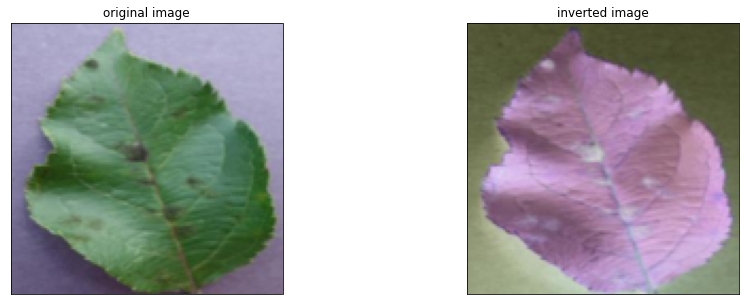

In [18]:
image, label  = dataset[0]
fig,(ax1,ax2) = plt.subplots(figsize=(15,5),nrows=1,ncols=2)
ax1.imshow(image.permute(1,2,0))
ax1.set_title("original image")
ax2.imshow(1-image.permute(1,2,0))
ax2.set_title("inverted image")
ax1.set_xticks([]); ax1.set_yticks([])
ax2.set_xticks([]); ax2.set_yticks([])
plt.show()

In [19]:
random_seed = 42
torch.manual_seed(random_seed)

In [20]:
validation_split = 0.3
val_size = int(len(dataset) * validation_split)
train_size = len(dataset) - val_size

train_ds,val_ds = random_split(dataset,[train_size,val_size])

In [21]:
batch_size = 64

train_loader = DataLoader(train_ds,batch_size=batch_size,num_workers=2,shuffle=True, pin_memory=True)
val_loader = DataLoader(val_ds,batch_size=batch_size,num_workers=2,shuffle=True, pin_memory=True)
test_loader = DataLoader(test_ds,batch_size=batch_size,num_workers=2,shuffle=True, pin_memory=True)

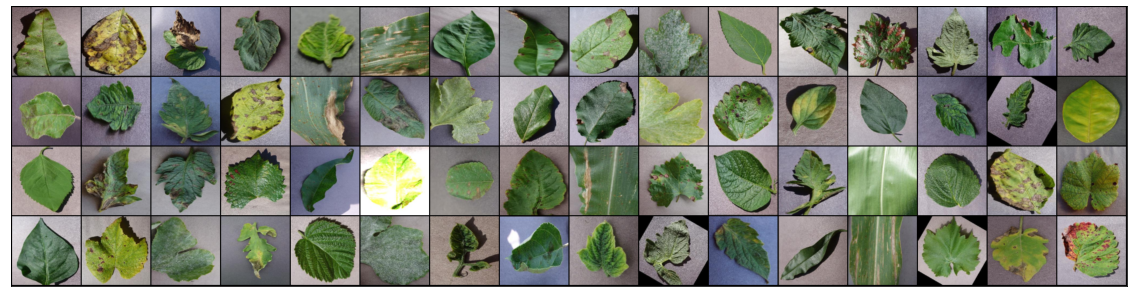

In [22]:
for images, labels in train_loader:
    fig, ax = plt.subplots(figsize=(20, 8))
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(make_grid(images, nrow=16).permute(1, 2, 0))
    break


In [23]:
def accuracy(outputs, labels):
  _ , preds = torch.max(outputs, dim=1)
  return torch.tensor(torch.sum(preds == labels).item() / len(preds))


class ImageClassificationBase(nn.Module):
    
  def training_step(self,batch):
    images,labels = batch
    out = self(images)
    loss = F.cross_entropy(out,labels)
    return loss

  def validation_step(self,batch):
    images,labels = batch
    out = self(images)
    loss = F.cross_entropy(out,labels)
    acc = accuracy(out,labels)
    return {'val_loss':loss,'val_acc':acc}

  def validation_epoch_end(self,outputs):
    batch_loss = [out['val_loss'] for out in outputs]
    epoch_loss = torch.stack(batch_loss).mean()
    batch_acc = [out['val_acc'] for out in outputs]
    epoch_acc = torch.stack(batch_acc).mean()
    return {'val_loss':epoch_loss.item(),'val_acc':epoch_acc.item()}

  def epoch_end(self,epoch,result):
    print("Epoch [{}], train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result['train_loss'], result['val_loss'], result['val_acc']))

In [24]:
class Plant_Disease_Model(ImageClassificationBase):
  
  def __init__(self):
    super().__init__()
    self.network = nn.Sequential(
        nn.Conv2d(3,32,kernel_size=3,stride=1,padding=1),
        nn.ReLU(),
        nn.Conv2d(32,64,kernel_size=3,stride=1,padding=1),
        nn.ReLU(),
        nn.MaxPool2d(2,2), #output : 64*64*64

        nn.Conv2d(64,64,kernel_size=3,stride=1,padding=1),
        nn.ReLU(),
        nn.Conv2d(64,128,kernel_size=3,stride=1,padding=1),
        nn.ReLU(),
        nn.MaxPool2d(2,2), #output : 128*32*32

        nn.Conv2d(128,128,kernel_size=3,stride=1,padding=1),
        nn.ReLU(),
        nn.Conv2d(128,256,kernel_size=3,stride=1,padding=1),
        nn.ReLU(),
        nn.MaxPool2d(2,2), #output : 256*16*16
        
        nn.Conv2d(256,256,kernel_size=3,stride=1,padding=1),
        nn.ReLU(),
        nn.Conv2d(256,512,kernel_size=3,stride=1,padding=1),
        nn.ReLU(),
        nn.MaxPool2d(2,2), #output : 512*8*8
        
        nn.Conv2d(512,512,kernel_size=3,stride=1,padding=1),
        nn.ReLU(),
        nn.Conv2d(512,1024,kernel_size=3,stride=1,padding=1),
        nn.ReLU(),
        nn.MaxPool2d(2,2), #output : 1024*4*4
        nn.AdaptiveAvgPool2d(1),
        
        nn.Flatten(),
        nn.Linear(1024,512),
        nn.ReLU(),
        nn.Linear(512,256),
        nn.ReLU(),
        nn.Linear(256,38)
        )
    
  def forward(self,xb):
    out = self.network(xb)
    return out

In [25]:
class Plant_Disease_Model1(ImageClassificationBase):
  
  def __init__(self):
    super().__init__()
    self.network = models.vgg16(pretrained=True)
    num_ftrs = self.network.classifier[-1].in_features
    self.network.classifier[-1] = nn.Linear(num_ftrs, 38)
    
  def forward(self,xb):
    out = self.network(xb)
    return out

In [26]:
class Plant_Disease_Model2(ImageClassificationBase):
  
  def __init__(self):
    super().__init__()
    self.network = models.resnet34(pretrained=True)
    num_ftrs = self.network.fc.in_features
    self.network.fc = nn.Linear(num_ftrs, 38)
    
  def forward(self,xb):
    out = self.network(xb)
    return out

In [27]:
@torch.no_grad()
def evaluate(model,val_loader):
  model.eval()
  outputs = [model.validation_step(batch) for batch in val_loader]
  return model.validation_epoch_end(outputs)

In [28]:
def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
  history = []
  optimizer = opt_func(model.parameters(), lr)
  for epoch in range(epochs):
    model.train()
    train_losses = []
    for batch in tqdm(train_loader):
      loss = model.training_step(batch)
      train_losses.append(loss)
      loss.backward()
      optimizer.step()
      optimizer.zero_grad()
    result = evaluate(model, val_loader)
    result['train_loss'] = torch.stack(train_losses).mean().item()
    model.epoch_end(epoch, result)
    history.append(result)
  return history

In [29]:
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')
    
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl: 
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

In [30]:
device = get_default_device()
device

device(type='cpu')

In [31]:
train_loader = DeviceDataLoader(train_loader, device)
val_loader = DeviceDataLoader(val_loader, device)
test_loader = DeviceDataLoader(test_loader, device)

In [32]:
model = to_device(Plant_Disease_Model1(), device)

C:\Users\poorna sri\AppData\Local\Programs\Python\Python310\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\poorna sri\AppData\Local\Programs\Python\Python310\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [33]:
model

Plant_Disease_Model1(
  (network): VGG(
    (features): Sequential(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU(inplace=True)
      (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (3): ReLU(inplace=True)
      (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (6): ReLU(inplace=True)
      (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (8): ReLU(inplace=True)
      (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (11): ReLU(inplace=True)
      (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (13): ReLU(inplace=True)
      (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (15): ReLU(inplace=Tru

In [34]:
history = fit(1, 0.001, model, train_loader, val_loader, opt_func=torch.optim.Adam)

  0%|          | 0/769 [00:00<?, ?it/s]

Epoch [0], train_loss: 2.2434, val_loss: 1.2183, val_acc: 0.6057


In [36]:
 history += fit(1, 0.001, model, train_loader, val_loader, opt_func = torch.optim.Adam) 

  0%|          | 0/769 [00:00<?, ?it/s]

Epoch [0], train_loss: 0.6705, val_loss: 0.5300, val_acc: 0.8472


In [35]:
 history += fit(1, 0.001, model, train_loader, val_loader, opt_func = torch.optim.Adam) 

  0%|          | 0/769 [00:00<?, ?it/s]

Epoch [0], train_loss: 1.0112, val_loss: 0.5930, val_acc: 0.8126


In [37]:
 history += fit( 1, 0.001, model, train_loader, val_loader, opt_func = torch.optim.Adam) 

  0%|          | 0/769 [00:00<?, ?it/s]

Epoch [0], train_loss: 0.5810, val_loss: 0.4579, val_acc: 0.8538


In [38]:
 history += fit(1, 0.001, model, train_loader, val_loader, opt_func = torch.optim.Adam) 

  0%|          | 0/769 [00:00<?, ?it/s]

Epoch [0], train_loss: 0.6185, val_loss: 0.3530, val_acc: 0.8864


In [60]:
 history += fit(1, 0.001, model, train_loader, val_loader, opt_func = torch.optim.Adam) 

  0%|          | 0/769 [00:00<?, ?it/s]

Epoch [0], train_loss: 0.4742, val_loss: 0.4067, val_acc: 0.8759


In [63]:
def plot_losses(history):
    train_losses = [x.get('train_loss') for x in history]
    val_losses = [x['val_loss'] for x in history]
    plt.plot(train_losses, '-bx')
    plt.plot(val_losses, '-rx')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['Training', 'Validation'])
    plt.title('Loss vs. No. of epochs');

In [64]:
def plot_accuracies(history):
    accuracies = [x['val_acc'] for x in history]
    plt.plot(accuracies, '-x')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.title('Accuracy vs. No. of epochs');

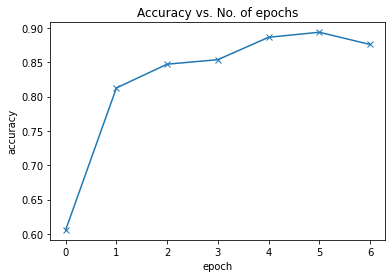

In [65]:
plot_accuracies(history)

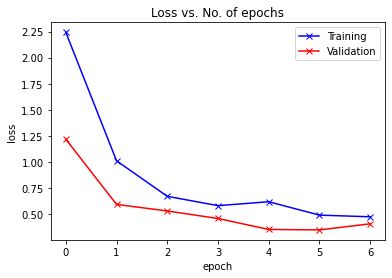

In [69]:
plot_losses(history)

In [70]:
evaluate(model,val_loader)

{'val_loss': 0.4066527485847473, 'val_acc': 0.8758049011230469}

In [71]:
evaluate(model,test_loader)

{'val_loss': 0.4186444878578186, 'val_acc': 0.873440682888031}

In [72]:
def predict_image(img, model):
    xb = to_device(img.unsqueeze(0), device)
    yb = model(xb)
    _, preds  = torch.max(yb, dim=1)
    return dataset.classes[preds[0].item()]

Label: Apple___Apple_scab , Predicted: Apple___Apple_scab


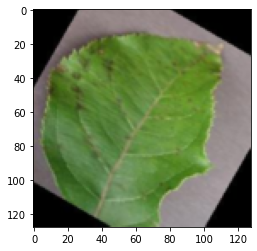

In [73]:
img, label = test_ds[25]
plt.imshow(img.permute(1, 2, 0))
print('Label:', dataset.classes[label], ', Predicted:', predict_image(img, model))

Label: Cherry_(including_sour)___healthy , Predicted: Cherry_(including_sour)___healthy


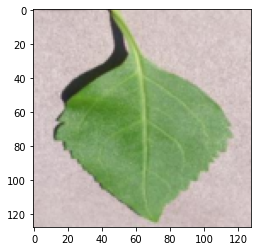

In [74]:
img, label = test_ds[3000]
plt.imshow(img.permute(1, 2, 0))
print('Label:', dataset.classes[label], ', Predicted:', predict_image(img, model))
